# Libraries

In [264]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

# Clients' table

In [265]:
path_bhv = "../Data/QVI_purchase_behaviour.csv"

In [266]:
df_bhv = pd.read_csv(path_bhv)

In [267]:
df_bhv

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [268]:
print("\nSummary Table Generated by .info() Method:")
print(df_bhv.info())


Summary Table Generated by .info() Method:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [269]:
all_duplicates = df_bhv[df_bhv.duplicated(keep=False)]
all_duplicates

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


## EDA Clients

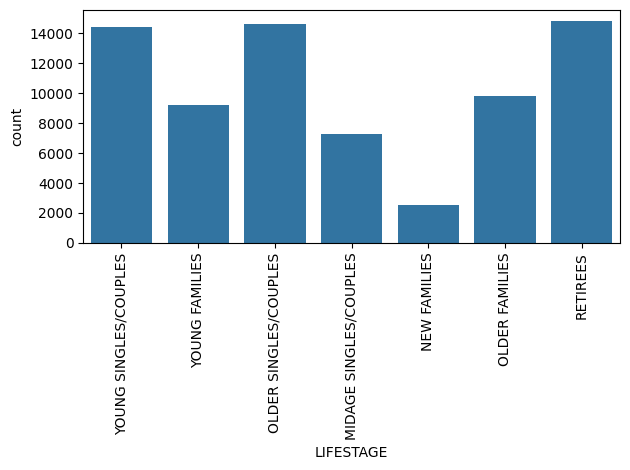

In [270]:
ax = sns.countplot(data= df_bhv, x='LIFESTAGE')
ax.tick_params(axis='x', rotation= 90)
plt.tight_layout()

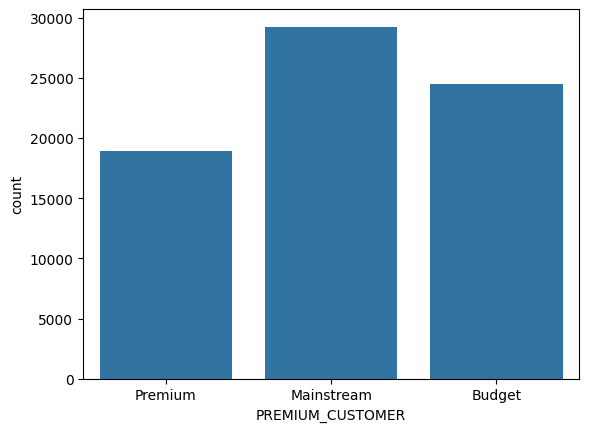

In [271]:
ax = sns.countplot(data=df_bhv, 
                   x="PREMIUM_CUSTOMER")


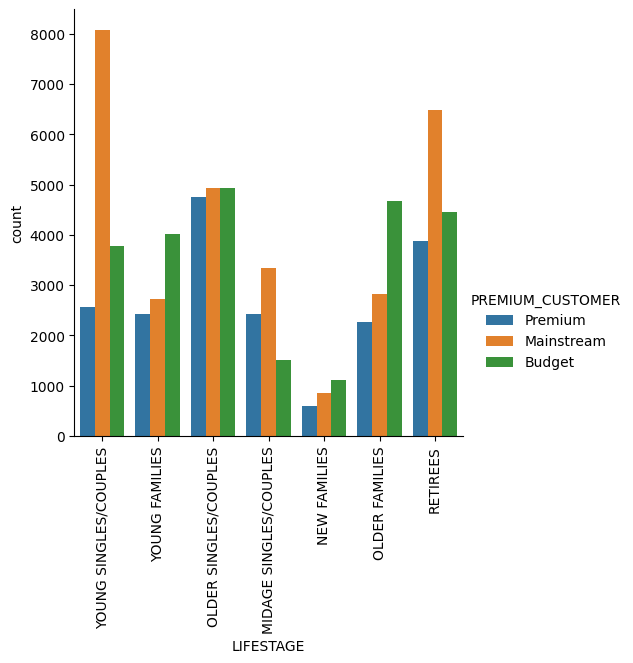

In [272]:
ax = sns.catplot(data= df_bhv, x="LIFESTAGE", 
                 hue="PREMIUM_CUSTOMER", 
                 kind="count")
ax.tick_params(axis="x", rotation = 90)

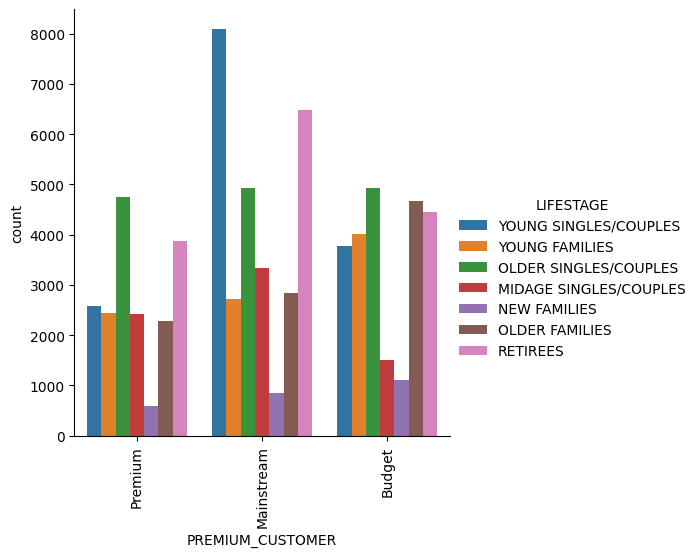

In [273]:
ax = sns.catplot(data= df_bhv, x="PREMIUM_CUSTOMER", 
                 hue="LIFESTAGE", 
                 kind="count")
ax.tick_params(axis="x", rotation = 90)

# Transactions

In [274]:
path = '../Data/QVI_transaction_data.xlsx'

In [275]:
df = pd.read_excel(path)

In [276]:
df.shape

(264836, 8)

In [277]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [278]:
print("\nSummary Table Generated by .info() Method:")
print(df.info())


Summary Table Generated by .info() Method:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


## Data cleaning 

### Date

In [279]:
df["DATE"] = pd.to_datetime(df["DATE"], unit="D", origin="1899-12-30")

In [280]:
df["DATE"].describe()

count                           264836
mean     2018-12-30 00:52:12.879215616
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

In [281]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Duplicates

In [282]:
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


### Product's name

#### Delete all no chips

In [283]:
unique_products = (
    df["PROD_NAME"]
    .str.lower()
    .str.strip()
    .unique()
)

words = pd.Series(" ".join(unique_products).split())

clean_words = words[words.str.match("^[a-zA-Z]+$")]

word_counts = clean_words.value_counts()

print(word_counts.to_string())

chips              21
smiths             16
crinkle            14
cut                14
kettle             13
salt               12
cheese             12
original           10
doritos             9
chip                9
salsa               9
corn                8
pringles            8
rrd                 8
chicken             7
ww                  7
sea                 6
sour                6
thinly              5
crisps              5
vinegar             5
thins               5
chilli              5
supreme             4
deli                4
rock                4
red                 4
cream               4
natural             4
infuzions           4
mild                3
old                 3
dip                 3
tostitos            3
tomato              3
ccs                 3
paso                3
el                  3
tortilla            3
soy                 3
cobs                3
popd                3
twisties            3
lime                3
woolworths          3
sensations

In [284]:
df[df["PROD_NAME"].str.contains("salsa", case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [285]:
df = df[~df["PROD_NAME"].str.contains("salsa", case=False, na=False)]

In [286]:
df.shape

(246742, 8)

In [287]:
df[df["PROD_NAME"].str.contains("salsa", case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


#### Weight separate  

In [288]:
df["PACK_SIZE"] = df["PROD_NAME"].str.extract(r"(\d+)").astype(int)
df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170


In [290]:
null_count = df["PACK_SIZE"].isna().sum()
null_count

np.int64(0)

In [254]:
df["PACK_SIZE"].describe().round()

count    246742.0
mean        176.0
std          59.0
min          70.0
25%         150.0
50%         170.0
75%         175.0
max         380.0
Name: PACK_SIZE, dtype: float64

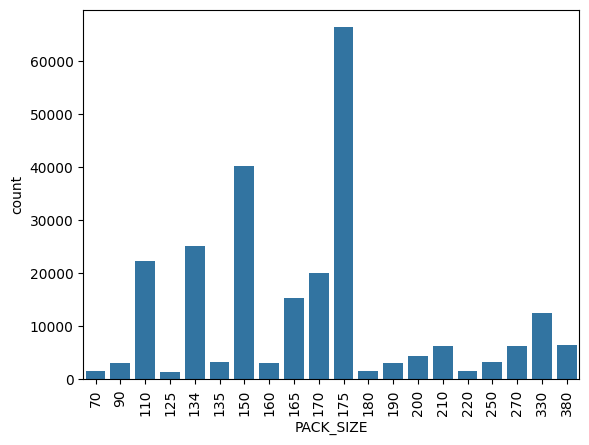

In [263]:
ax = sns.countplot(data=df, x="PACK_SIZE")
ax.tick_params(axis="x", rotation = 90)

#### Brands name processing

### Outliers

In [178]:
print("\nSummary Table Generated by .describe() Method:")
print(df.describe().round())


Summary Table Generated by .describe() Method:
                                DATE  STORE_NBR  LYLTY_CARD_NBR     TXN_ID  \
count                         246742   246742.0        246742.0   246742.0   
mean   2018-12-30 01:19:01.211467520      135.0        135531.0   135131.0   
min              2018-07-01 00:00:00        1.0          1000.0        1.0   
25%              2018-09-30 00:00:00       70.0         70015.0    67569.0   
50%              2018-12-30 00:00:00      130.0        130367.0   135183.0   
75%              2019-03-31 00:00:00      203.0        203084.0   202654.0   
max              2019-06-30 00:00:00      272.0       2373711.0  2415841.0   
std                              NaN       77.0         80715.0    78148.0   

       PROD_NBR  PROD_QTY  TOT_SALES  
count  246742.0  246742.0   246742.0  
mean       56.0       2.0        7.0  
min         1.0       1.0        2.0  
25%        26.0       2.0        6.0  
50%        53.0       2.0        7.0  
75%        87.0

In [179]:
outlier_prod_qty = df[df['PROD_QTY'] == 200]
outlier_prod_qty

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [180]:
transactions_by_user = df[df["LYLTY_CARD_NBR"] == 226000]
transactions_by_user

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [181]:
df = df[~(df['LYLTY_CARD_NBR'] == 226000)]

In [182]:
transactions_by_user = df[df["LYLTY_CARD_NBR"] == 226000]
transactions_by_user

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


In [260]:
df[['PROD_QTY',"TOT_SALES"]].describe().round()

,PROD_QTY,TOT_SALES
count,246742.0,246742.0
mean,2.0,7.0
std,1.0,3.0
min,1.0,2.0
25%,2.0,6.0
50%,2.0,7.0
75%,2.0,9.0
max,200.0,650.0


### Temporal data validation

In [ ]:
df.info()


Summary Table Generated by .info() Method:
<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   PACK_SIZE       246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.8+ MB
None


In [185]:
date_counts = df.groupby("DATE").size()

In [186]:
df = df.set_index('DATE')

In [187]:
all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

In [188]:
missing_dates = all_days.difference(df.index)
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

1 Дубль транзакции 108462 


